In [1]:
import pandas as pd
import numpy as np

X = pd.read_csv('./jinnan_round1_train_20181227.csv',encoding = 'gb18030')
y = pd.read_csv('./jinnan_round1_testA_20181227.csv',encoding = 'gb18030')
submit = pd.read_csv('./jinnan_round1_submit_20181227.csv',encoding = 'gb18030')


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
X.head()

,样本id,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,A23,A24,A25,A26,A27,A28,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,B12,B13,B14,收率
0,sample_1528,300,NaN,405.0,700,13:30:00,38.0,NaN,NaN,15:30:00,100,16:30:00,102,0.2,17:30:00,103.0,18:30:00,104.0,0.2,300,21:00-21:30,50.0,9.0,5.0,22:00:00,75,22:30:00,70,6:30-7:00,350.0,3.5,3.5,7:00-8:00,8:00:00,65,11:30:00,45.0,11:30-13:00,14:00-15:30,NaN,800.0,0.15,400,0.879
1,sample_1698,300,NaN,405.0,700,14:00:00,29.0,NaN,NaN,16:00:00,101,17:00:00,103,0.2,18:00:00,104.0,19:00:00,105.0,0.2,200,19:00-20:00,50.0,9.0,5.0,20:00:00,80,21:00:00,73,21:00-22:00,320.0,3.5,3.5,22:00-23:00,23:00:00,80,6:00:00,45.0,6:00-7:30,7:30-9:00,9:00-10:00,1200.0,0.15,400,0.902
2,sample_639,300,NaN,405.0,700,14:00:00,29.0,NaN,NaN,16:00:00,102,17:00:00,103,0.2,18:00:00,104.0,19:00:00,105.0,0.2,200,19:00-19:30,50.0,9.0,5.0,20:00:00,79,21:00:00,73,21:00-22:00,320.0,3.5,3.5,22:00-23:00,23:00:00,80,1:00:00,45.0,1:00-2:30,2:30-4:00,4:00-5:00,1200.0,0.15,400,0.936
3,sample_483,300,NaN,405.0,700,1:30:00,38.0,NaN,NaN,3:00:00,100,4:00:00,102,0.2,5:00:00,103.0,6:00:00,104.0,0.2,200,6:30-7:00,50.0,10.0,5.0,7:30:00,70,8:00:00,78,13:30-14:30,290.0,3.5,3.5,14:30-15:30,15:30:00,65,18:00:00,45.0,19:00-20:30,21:30-23:00,NaN,800.0,0.15,400,0.902
4,sample_617,300,NaN,405.0,700,22:00:00,29.0,NaN,NaN,0:00:00,101,1:00:00,103,0.2,2:00:00,104.0,3:00:00,105.0,0.2,200,3:00-4:00,50.0,9.0,5.0,4:00:00,80,5:00:00,73,5:00-6:00,320.0,3.5,3.5,6:00-7:00,7:00:00,80,9:00:00,45.0,9:00-10:30,10:30-12:00,12:00-13:00,1200.0,0.15,420,0.983


In [4]:
submit.head()

,sample_1656,0.01
0,sample_1548,0.01
1,sample_769,0.01
2,sample_1881,0.01
3,sample_1807,0.01
4,sample_145,0.01


In [5]:
X.shape

(1396, 44)

In [6]:
y.shape

(150, 43)

In [8]:
all = pd.concat((X.iloc[:, :43], y), ignore_index=True)
y = X.iloc[:, 43:44]

In [9]:
all.describe()

,A1,A2,A3,A4,A6,A8,A10,A12,A13,A15,A17,A18,A19,A21,A22,A23,A27,B1,B2,B3,B6,B8,B12,B13,B14
count,1546.000000,45.0,1501.000000,1546.000000,1546.000000,167.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1543.000000,1546.000000,1543.000000,1545.000000,1535.000000,1544.000000,1544.000000,1546.000000,1545.000000,1545.000000,1545.000000,1546.000000
mean,298.900388,125.0,403.570953,705.789133,28.393079,78.958084,100.861578,102.654722,0.199916,103.827749,104.775679,0.199935,231.940492,48.690862,9.118047,5.002592,74.385113,335.336482,3.452332,3.500065,72.065977,43.711327,1019.805825,0.149476,410.823415
std,9.955586,0.0,13.145587,52.364711,6.965389,2.567999,0.906781,0.912385,0.002399,0.980119,1.401771,0.002543,51.807326,4.954759,0.365774,0.129825,3.150567,107.244534,0.397168,0.002545,9.177123,4.328276,206.114344,0.007806,27.232486
min,200.000000,125.0,270.000000,470.000000,17.000000,70.000000,100.000000,98.000000,0.120000,100.000000,89.000000,0.100000,100.000000,20.000000,3.500000,4.000000,45.000000,3.500000,0.150000,3.500000,40.000000,20.000000,400.000000,0.030000,40.000000
25%,300.000000,125.0,405.000000,700.000000,24.000000,80.000000,100.000000,102.000000,0.200000,103.000000,104.000000,0.200000,200.000000,50.000000,9.000000,5.000000,73.000000,320.000000,3.500000,3.500000,65.000000,45.000000,800.000000,0.150000,400.000000
50%,300.000000,125.0,405.000000,700.000000,29.000000,80.000000,101.000000,103.000000,0.200000,104.000000,105.000000,0.200000,200.000000,50.000000,9.000000,5.000000,73.000000,320.000000,3.500000,3.500000,78.000000,45.000000,1200.000000,0.150000,400.000000
75%,300.000000,125.0,405.000000,700.000000,30.000000,80.000000,102.000000,103.000000,0.200000,104.000000,105.000000,0.200000,300.000000,50.000000,9.000000,5.000000,77.000000,330.000000,3.500000,3.500000,80.000000,45.000000,1200.000000,0.150000,420.000000
max,300.000000,125.0,405.000000,980.000000,97.000000,82.000000,103.000000,107.000000,0.200000,109.000000,108.000000,0.200000,700.000000,90.000000,10.000000,10.000000,80.000000,1200.000000,3.600000,3.600000,80.000000,73.000000,1200.000000,0.150000,785.000000


In [10]:
all.head()

,样本id,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,A23,A24,A25,A26,A27,A28,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,B12,B13,B14
0,sample_1528,300,NaN,405.0,700,13:30:00,38.0,NaN,NaN,15:30:00,100,16:30:00,102.0,0.2,17:30:00,103.0,18:30:00,104.0,0.2,300,21:00-21:30,50.0,9.0,5.0,22:00:00,75,22:30:00,70.0,6:30-7:00,350.0,3.5,3.5,7:00-8:00,8:00:00,65,11:30:00,45.0,11:30-13:00,14:00-15:30,NaN,800.0,0.15,400
1,sample_1698,300,NaN,405.0,700,14:00:00,29.0,NaN,NaN,16:00:00,101,17:00:00,103.0,0.2,18:00:00,104.0,19:00:00,105.0,0.2,200,19:00-20:00,50.0,9.0,5.0,20:00:00,80,21:00:00,73.0,21:00-22:00,320.0,3.5,3.5,22:00-23:00,23:00:00,80,6:00:00,45.0,6:00-7:30,7:30-9:00,9:00-10:00,1200.0,0.15,400
2,sample_639,300,NaN,405.0,700,14:00:00,29.0,NaN,NaN,16:00:00,102,17:00:00,103.0,0.2,18:00:00,104.0,19:00:00,105.0,0.2,200,19:00-19:30,50.0,9.0,5.0,20:00:00,79,21:00:00,73.0,21:00-22:00,320.0,3.5,3.5,22:00-23:00,23:00:00,80,1:00:00,45.0,1:00-2:30,2:30-4:00,4:00-5:00,1200.0,0.15,400
3,sample_483,300,NaN,405.0,700,1:30:00,38.0,NaN,NaN,3:00:00,100,4:00:00,102.0,0.2,5:00:00,103.0,6:00:00,104.0,0.2,200,6:30-7:00,50.0,10.0,5.0,7:30:00,70,8:00:00,78.0,13:30-14:30,290.0,3.5,3.5,14:30-15:30,15:30:00,65,18:00:00,45.0,19:00-20:30,21:30-23:00,NaN,800.0,0.15,400
4,sample_617,300,NaN,405.0,700,22:00:00,29.0,NaN,NaN,0:00:00,101,1:00:00,103.0,0.2,2:00:00,104.0,3:00:00,105.0,0.2,200,3:00-4:00,50.0,9.0,5.0,4:00:00,80,5:00:00,73.0,5:00-6:00,320.0,3.5,3.5,6:00-7:00,7:00:00,80,9:00:00,45.0,9:00-10:30,10:30-12:00,12:00-13:00,1200.0,0.15,420


In [11]:
time = ['A5','A9','A11','A14','A16','A20','A24','A26','A28','B4','B5','B7','B9','B10','B11']
log_col = ['A3','A4','B2','B12']
drop_col = ['A2','A7','A8','B13','B3','A23','A18','A13','样本id']
continue_col = ['A6','A27','B6','B8','B1','A1','A12','A15','A17']
cat_col = ['A19','A21','A22','B14','A25']

In [12]:
all.drop(drop_col, axis=1, inplace=True)

In [13]:
from sklearn.preprocessing import LabelEncoder
def lbe(cols):
    for c in cols:
        lbl = LabelEncoder()
        lbl.fit(list(all[c].values))
        all[c] = lbl.transform(list(all[c].values))

In [15]:
lbe(time)

In [16]:
def fillque(cols):
    for col in cols:
        all[col].fillna(all[col].mode()[0] ,inplace=True)
def fillmean(cols):
    for col in cols:
        all[col].fillna(all[col].mean() ,inplace=True)

In [17]:
fillque(cat_col)
fillque(log_col)
fillque(continue_col)

In [18]:
lbe(cat_col)

In [19]:
all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1546 entries, 0 to 1545
Data columns (total 34 columns):
A1     1546 non-null int64
A3     1546 non-null float64
A4     1546 non-null int64
A5     1546 non-null int64
A6     1546 non-null float64
A9     1546 non-null int64
A10    1546 non-null int64
A11    1546 non-null int64
A12    1546 non-null float64
A14    1546 non-null int64
A15    1546 non-null float64
A16    1546 non-null int64
A17    1546 non-null float64
A19    1546 non-null int64
A20    1546 non-null int64
A21    1546 non-null int64
A22    1546 non-null int64
A24    1546 non-null int64
A25    1546 non-null int64
A26    1546 non-null int64
A27    1546 non-null float64
A28    1546 non-null int64
B1     1546 non-null float64
B2     1546 non-null float64
B4     1546 non-null int64
B5     1546 non-null int64
B6     1546 non-null int64
B7     1546 non-null int64
B8     1546 non-null float64
B9     1546 non-null int64
B10    1546 non-null int64
B11    1546 non-null int64
B12    1546

In [20]:
def log_func(cols):
    for col in cols:
        all[col] = np.log(all[col])

In [21]:
log_func(log_col)

In [22]:
all_type = all.astype('float64')

In [23]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
all_scaler = min_max_scaler.fit_transform(all_type)
all_df = pd.DataFrame(all_scaler)

In [24]:
all_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
0,1.0,1.0,0.542102,0.208955,0.2625,0.268041,0.000000,0.364583,0.444444,0.436170,0.333333,0.447917,0.789474,0.428571,0.598802,0.545455,0.666667,0.645161,0.333333,0.700000,0.714286,0.871951,0.289595,0.991136,0.917582,0.919355,0.625,0.086207,0.471698,0.114583,0.214660,1.000000,0.63093,0.714286
1,1.0,1.0,0.542102,0.238806,0.1500,0.288660,0.333333,0.385417,0.555556,0.457447,0.444444,0.479167,0.842105,0.285714,0.497006,0.545455,0.666667,0.559140,0.714286,0.633333,0.800000,0.585366,0.264522,0.991136,0.664835,0.629032,1.000,0.844828,0.471698,0.828125,0.916230,0.948718,1.00000,0.714286
2,1.0,1.0,0.542102,0.238806,0.1500,0.288660,0.666667,0.385417,0.555556,0.457447,0.444444,0.479167,0.842105,0.285714,0.491018,0.545455,0.666667,0.559140,0.619048,0.633333,0.800000,0.585366,0.264522,0.991136,0.664835,0.629032,1.000,0.482759,0.471698,0.484375,0.732984,0.692308,1.00000,0.714286
3,1.0,1.0,0.542102,0.537313,0.2625,0.701031,0.000000,0.760417,0.444444,0.829787,0.333333,0.875000,0.789474,0.285714,0.898204,0.545455,1.000000,0.913978,0.047619,0.944444,0.942857,0.213415,0.239448,0.991136,0.236264,0.258065,0.625,0.413793,0.471698,0.432292,0.607330,1.000000,0.63093,0.714286
4,1.0,1.0,0.542102,0.611940,0.1500,0.000000,0.333333,0.552083,0.555556,0.755319,0.444444,0.802083,0.842105,0.285714,0.760479,0.545455,0.666667,0.806452,0.714286,0.844444,0.800000,0.823171,0.264522,0.991136,0.868132,0.854839,1.000,0.982759,0.471698,0.968750,0.073298,0.179487,1.00000,0.857143


In [25]:
x = all_df.loc[:1395, :]
test = all_df.loc[1396:, :]

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
model_LinearRegression = linear_model.LinearRegression()

In [27]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=4)

C:\Users\liyc\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [28]:
model = model_LinearRegression
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [29]:
metrics.mean_squared_error(y_predict, y_test)

0.0006375423551443478

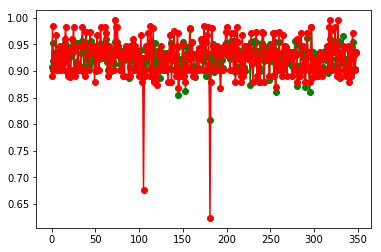

In [36]:
import matplotlib.pyplot as plt
from scipy import stats
plt.figure()
plt.plot(np.arange(len(y_predict)), y_predict,'go-',label='predict value')
plt.plot(np.arange(len(y_predict)),y_test,'ro-',label='test value')
plt.show()

In [35]:
plt.figure()
plt.show()

<Figure size 432x288 with 0 Axes>

In [32]:
predict = model.predict(test)

In [33]:
submit['0.01']=predict[1:]
submit.head()

,sample_1656,0.01
0,sample_1548,0.872672
1,sample_769,0.933443
2,sample_1881,0.932400
3,sample_1807,0.931545
4,sample_145,0.919308


In [34]:
submit.to_csv('submit_predict.csv')